<a href="https://colab.research.google.com/github/ykro/ML-SP1-2021/blob/main/Lesson-03/L3N2_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt

#dark theme
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print('train_images shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

train_images shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

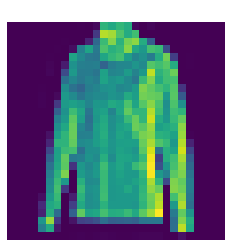

In [5]:
index = np.random.randint(train_images.shape[0])

plt.imshow(train_images[index])
plt.title(class_names[train_labels[index]])
plt.axis('off')
plt.show()

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images.max(), train_images.min()

(1.0, 0.0)

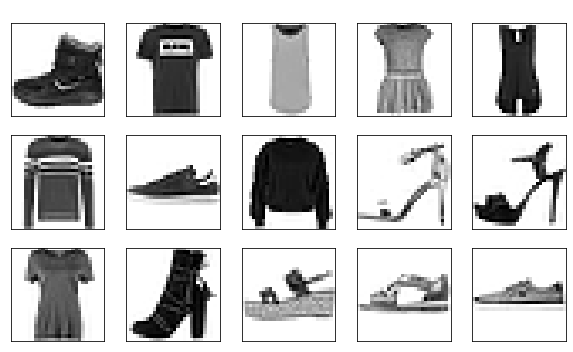

In [7]:
plt.figure(figsize=(10,10))
for i in range(15):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[i]])
plt.show()

In [8]:
epochs = 20
batch_size = 120
validation_split = 0.2

In [9]:
train_images[0].shape

(28, 28)

In [10]:
len(class_names)

10

In [11]:
model = Sequential([
  Flatten(input_shape=(28,28)),
  Dense(512, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')                  
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 435,402
Trainable params: 435,402
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(train_images, train_labels,
                    epochs=epochs,
                    validation_split=validation_split,
                    batch_size=batch_size)

Epoch 1/20
400/400 [==============================] - 3s 3ms/step - loss: 0.6773 - accuracy: 0.7637 - val_loss: 0.4042 - val_accuracy: 0.8549
Epoch 2/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3754 - accuracy: 0.8660 - val_loss: 0.3706 - val_accuracy: 0.8621
Epoch 3/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3333 - accuracy: 0.8790 - val_loss: 0.3405 - val_accuracy: 0.8734
Epoch 4/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3134 - accuracy: 0.8861 - val_loss: 0.3499 - val_accuracy: 0.8727
Epoch 5/20
400/400 [==============================] - 1s 2ms/step - loss: 0.2918 - accuracy: 0.8921 - val_loss: 0.3215 - val_accuracy: 0.8815
Epoch 6/20
400/400 [==============================] - 1s 2ms/step - loss: 0.2688 - accuracy: 0.8997 - val_loss: 0.3465 - val_accuracy: 0.8752
Epoch 7/20
400/400 [==============================] - 1s 2ms/step - loss: 0.2613 - accuracy: 0.9031 - val_loss: 0.3301 - val_accuracy: 0.8811
Epoch 